<a href="https://colab.research.google.com/github/harveenkaur282-web/deep_learning_lab_practicals/blob/main/cnn_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
x_test.shape

(10000, 28, 28)

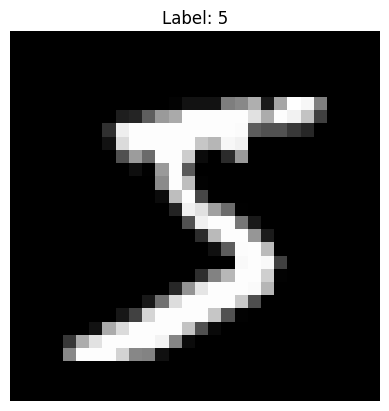

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

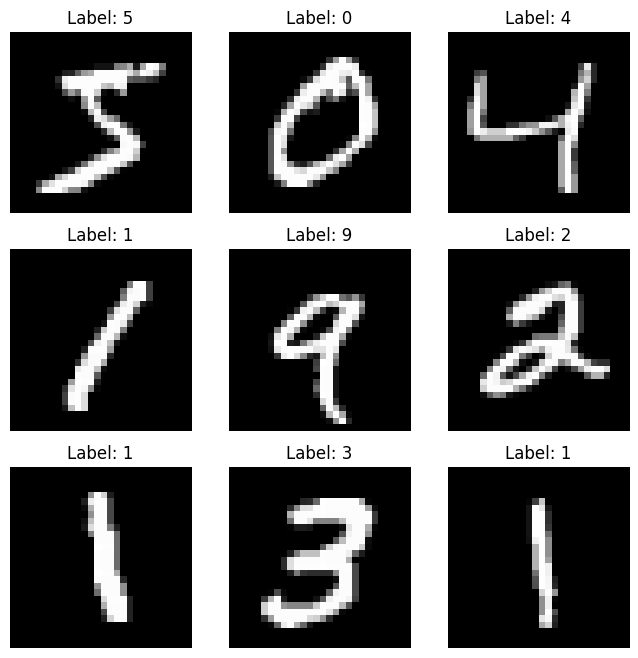

In [ ]:
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [ ]:
print("Image shape:", x_train[0].shape)

Image shape: (28, 28)


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:

from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9089 - loss: 0.3067 - val_accuracy: 0.9848 - val_loss: 0.0438
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9842 - loss: 0.0507 - val_accuracy: 0.9886 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9903 - loss: 0.0301 - val_accuracy: 0.9884 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9934 - loss: 0.0217 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9952 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0281


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9876 - loss: 0.0373
Test accuracy: 0.9909999966621399


In [ ]:
pred = model.predict(x_test)
print("Predicted digit:", pred[0].argmax())
print("Actual digit:", y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted digit: 7
Actual digit: 7
